#Connecting to drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')     #mount() to connect with drive

Mounted at /content/drive


#Linear Regression
#Energy Efficiency Dataset


##Importing libraries and the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,GridSearchCV


In [3]:
import pandas as pd
df_org = pd.read_csv("/content/drive/MyDrive/capstone project/energy_efficiency.csv")

In [4]:
#copying orignal to ensure data integrity on original dataset

df=df_org.copy()
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [5]:
#Renaming columns to increase readability..
#column names found after researching on the web

df.columns = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area','Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution','Heating_Load', 'Cooling_Load']

df      #printing df to check the renamed columns and check the basic info

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [6]:
df.head()     #printing first five rows

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [7]:
df.info()   #checkig datatypes and non_null value counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [8]:
df.isnull().sum()     #Checking if there is any null values

,0
Relative_Compactness,0
Surface_Area,0
Wall_Area,0
Roof_Area,0
Overall_Height,0
Orientation,0
Glazing_Area,0
Glazing_Area_Distribution,0
Heating_Load,0
Cooling_Load,0


In [9]:
df.duplicated().sum()     #Checking if there is any duplicated values

np.int64(0)

In [10]:
df.describe()         #Checking statistical distribution on the data

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


#checking Outliers and Handling them

In [11]:
#from describe() we found greater standard deviations on Surface_Area and Roof_Area
#indicating possible outliers
#therefore handling them using IQR method

#Removing outliers from Surface_area
q1=df["Surface_Area"].quantile(0.25)
q3=df["Surface_Area"].quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
df=df[(df['Surface_Area']>=lower)&(df['Surface_Area']<=upper)]

#Removing outliers from Roof_Area
q1=df["Roof_Area"].quantile(0.25)
q3=df["Roof_Area"].quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
df=df[(df['Roof_Area']>=lower)&(df['Roof_Area']<=upper)]


#Visualization

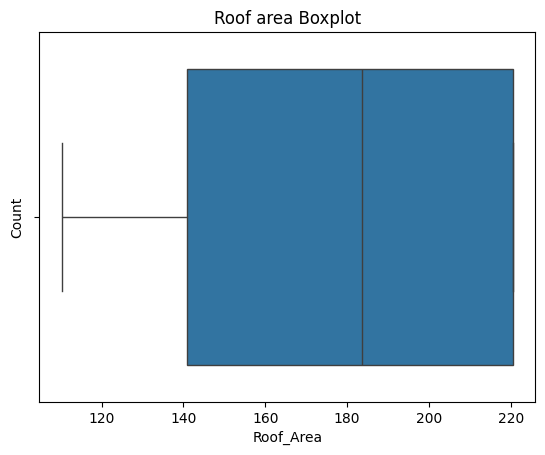

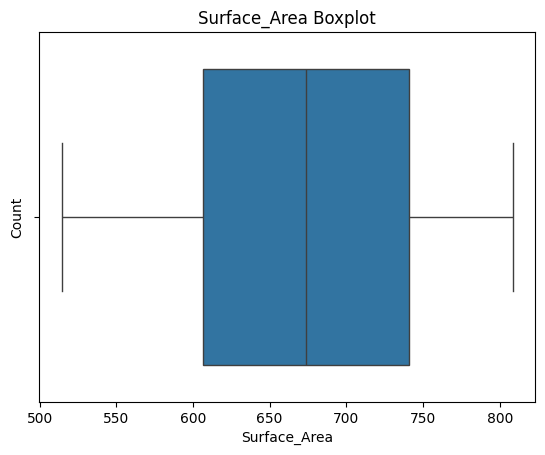

In [12]:
sns.boxplot(x="Roof_Area",data=df)
plt.title("Roof area Boxplot")
plt.ylabel("Count")
plt.show()
print("\n\n")
sns.boxplot(x="Surface_Area",data=df)
plt.title("Surface_Area Boxplot")
plt.ylabel("Count")
plt.show()

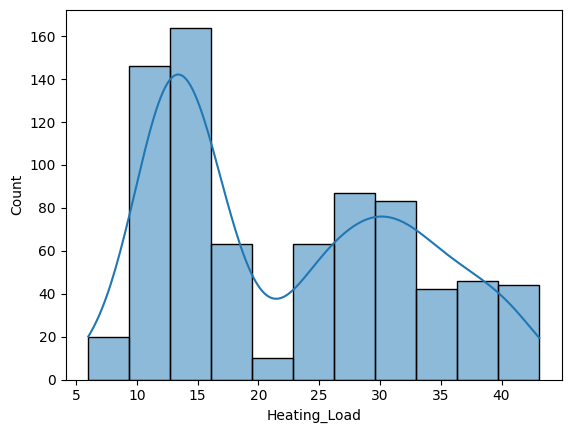

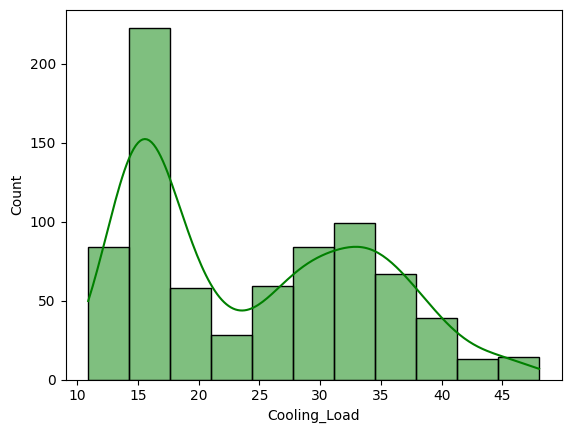

In [ ]:
#Checking the distribution of our Target variables
sns.histplot(df["Heating_Load"],kde=True)
plt.show()
print("\n")
sns.histplot(df["Cooling_Load"],kde=True,color="green")
plt.show()

<Axes: >

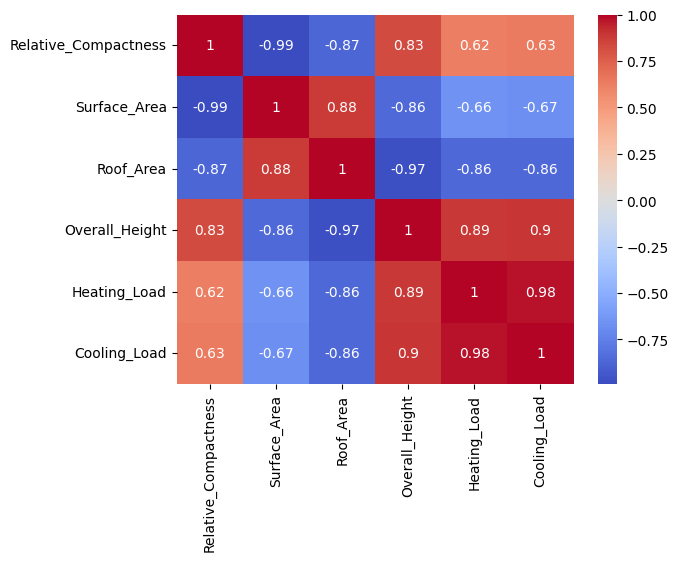

In [13]:
#finding correlations between variales and target_variables
heat=['Relative_Compactness', 'Surface_Area','Roof_Area','Overall_Height','Heating_Load','Cooling_Load']
corr=df[heat].corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")

#boxplots for Feature impact

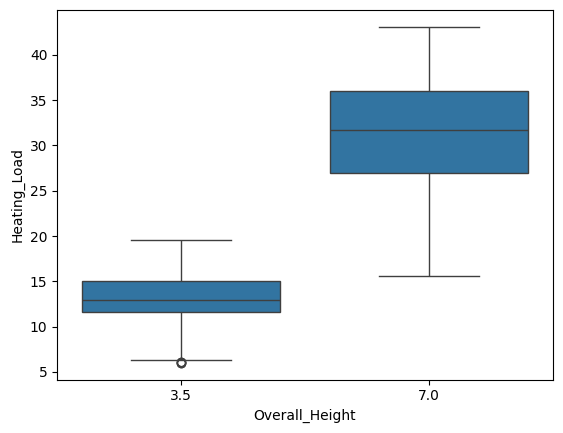

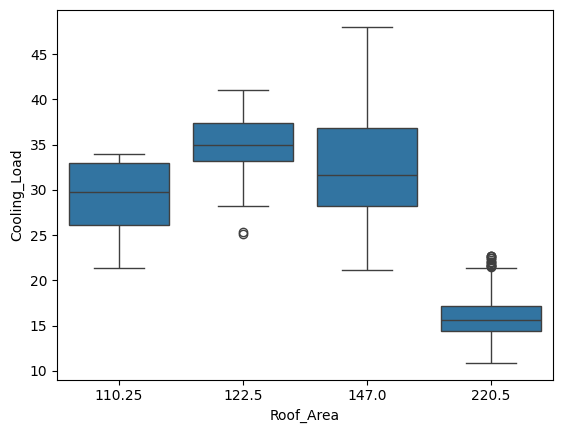

In [ ]:
#checking the affects of overall height and roof area with heating load
#and cooling load respectively
sns.boxplot(x="Overall_Height",y="Heating_Load",data=df)
plt.show()
print("\n")
sns.boxplot(x="Roof_Area",y="Cooling_Load",data=df)
plt.show()

#Feature Scaling

In [15]:
X=df.drop(["Heating_Load","Cooling_Load"],axis=1)
# we dropped atarget_Variables temporarily to separate inputs and targets
#axis is used to indicate whether rows or columns should be dropped
y1=df["Heating_Load"]
y2=df["Cooling_Load"]

#modeling

In [16]:
from sklearn.preprocessing import StandardScaler
#Splitting data into train and test
X_train,X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.2, random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
print("X_train_scaled size",len(X_train))
print("X_test_scaled size",len(X_test))

X_train_scaled size 614
X_test_scaled size 154


In [19]:
#creating a model
model=Ridge()

model_y1=Ridge().fit(X_train_scaled,y1_train)

model_y2=Ridge().fit(X_train_scaled,y2_train)

In [ ]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [ ]:
df.tail()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


In [ ]:
#Predicting a value with model
sample=[[0.62,808.5,367.5,220.5,3.5,4,0.4,5]]
sample_scaled=scaler.transform(sample)
print("Predicted Heating Load:",model_y1.predict(sample_scaled))

print("Predicted Cooling Load:",model_y2.predict(sample_scaled))

Predicted Heating Load: [19.22028777]
Predicted Cooling Load: [19.93245691]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [20]:
#Finding Errors
y1_pred = model_y1.predict(X_test_scaled)
y2_pred = model_y2.predict(X_test_scaled)

mse_y1 = mean_squared_error(y1_test, y1_pred)
r2_y1 = r2_score(y1_test, y1_pred)

mse_y2 = mean_squared_error(y2_test, y2_pred)
r2_y2 = r2_score(y2_test, y2_pred)

print("Heating Load Evaluation:")
print(f" - Mean Squared Error (MSE): {mse_y1:.4f}")
print(f" - R2 Score: {r2_y1:.4f}")

print("\nCooling Load Evaluation:")
print(f" - Mean Squared Error (MSE): {mse_y2:.4f}")
print(f" - R2 Score: {r2_y2:.4f}")

print("\nAverage errors:\n")
avg_mse=(mse_y1+mse_y2)/2
avg_r2=(r2_y1+r2_y2)/2
print(f"- The average Mean squared error is :{avg_mse:.4f}")
print(f"- The average R2_score error is :{avg_r2:.4f}")

Heating Load Evaluation:
 - Mean Squared Error (MSE): 9.2138
 - R2 Score: 0.9116

Cooling Load Evaluation:
 - Mean Squared Error (MSE): 9.9372
 - R2 Score: 0.8928

Average errors:

- The average Mean squared error is :9.5755
- The average R2_score error is :0.9022


#**Using Hyperparameter tuning**

##Setting up parameters

In [21]:
params={'alpha':[0.1,1.0,10.0,100.0]}

#Setting up grid search cv

In [22]:
grid1=GridSearchCV(Ridge(),params,cv=5,scoring='neg_mean_squared_error')
grid1.fit(X_train_scaled,y1_train)
grid2=GridSearchCV(Ridge(),params,cv=5,scoring='neg_mean_squared_error')
grid2.fit(X_train_scaled,y2_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1.0, 10.0, 100.0]},
             scoring='neg_mean_squared_error')

#Printing hyperparameter

In [23]:
print("Best Hyperparameters:",grid1.best_params_)
print("Best Hyperparameters:",grid2.best_params_)

Best Hyperparameters: {'alpha': 0.1}
Best Hyperparameters: {'alpha': 0.1}


#Training final model using hyperparameter

In [24]:
best_alpha=grid1.best_params_["alpha"]
final_model1=Ridge(alpha=best_alpha)
final_model1.fit(X_train_scaled,y1_train)
best_alpha=grid2.best_params_["alpha"]
final_model2=Ridge(alpha=best_alpha)
final_model2.fit(X_train_scaled,y2_train)

Ridge(alpha=0.1)

#Evaluatiing the final model

In [25]:
y_pred1=final_model1.predict(X_test_scaled)
mse1=mean_squared_error(y1_test,y_pred1)
print("MSE_Heating:",mse1)
r2_y1 = r2_score(y1_test, y_pred1)
print("R2_Heating:",r2_y1)
y_pred2=final_model2.predict(X_test_scaled)
mse2=mean_squared_error(y2_test,y_pred2)
print("MSE_cooling:",mse2)
r2_y2 = r2_score(y1_test, y_pred2)
print("R2_cooling:",r2_y2)

#Average mse after tuning:
mse=(mse1+mse2)/2
r2=(r2_y1+r2_y2)/2
print(f"Final mse after tuning :{mse:.4f}")
print(f"final R2 score after tuning:{r2:.4f}")


MSE_Heating: 9.158899083083172
R2_Heating: 0.912129301496784
MSE_cooling: 9.895537328655148
R2_cooling: 0.8652275560132892
Final mse after tuning :9.5272
final R2 score after tuning:0.8887


#Comparing mse and r2 score before and after tuning

In [26]:
print(f"Final mse before tuning is :{avg_mse:.4f}")
print(f"Final mse after tuning :{mse:.4f}")

print(f"\nFinal R2 score before tuning:{avg_r2:.4f}")
print(f"Final R2 score after tuning:{r2:.4f}")

Final mse before tuning is :9.5755
Final mse after tuning :9.5272

Final R2 score before tuning:0.9022
Final R2 score after tuning:0.8887
